In [1]:
# Given a defect free coupler path in 3D space made of 100 discrete point
# Represents a point in 300-Dimensional space
# Cluster these points into groups

# Or first find their lower dimensional representation and then cluster
# Try K-Nearest Neighbours
# Try Gaussian Mixture Models
# Try Manifold learning

# Perform Hierarchical Clustering (K-Mean)(also try Dendrogram)

K-mean clustering algo is used to cluster unlabeled data into 'n' classes. In our implementation, we choose the optimal hyperparameter 'n' using the elbow method. Sum of squared error, defined as sum of the squared distance between centroid and each member of the cluster, is calculated and plotted for each value of hyperparameter 'n'. 

In [1]:
import os
import numpy as np
from keras.models import Model, load_model

# Load Autoencoder model with Z=3
filename='AE_Z3_val_loss_0.0435.h5'
path=os.path.join('models',filename)
AE_Z3 = load_model(path)
E_Z3 = Model(AE_Z3.input, AE_Z3.layers[6].output)
E_Z3.summary()

Using TensorFlow backend.














_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_53 (InputLayer)        (None, 100, 3)            0         
_________________________________________________________________
flatten_53 (Flatten)         (None, 300)               0         
_________________________________________________________________
dense_341 (Dense)            (None, 100)               30100     
_________________________________________________________________
dense_342 (Dense)            (None, 30)                3030      
_________________________________________________________________
dense_343 (Dense)            (None, 20)                620       
_________________________________________________________________
dense_344 (Dense)            (None, 10)                210       
_________________________________________________________________
dense_345 (Dense)            (None, 3)                 33       

# Import Database

In [2]:
# Import data offline
current_dir=os.getcwd()
db_path=os.path.join(current_dir,'..','1. DB Preprocessing','norm_database5SS.npz')
db = np.load(db_path)


In [3]:
print(db.files)
cplr=db['cplrData']
mech=db['mechData']

print(cplr.shape)
print(mech.shape)

['cplrData', 'mechData']
(1453, 100, 3)
(1453, 11, 3)


In [4]:
x= cplr

# Split data into training and testing dataset
from sklearn.model_selection import train_test_split
x_train, x_test, _, _ = train_test_split(x, x, test_size=0.2, random_state=1)

# Plotting z-space parameters of data

In [5]:
%matplotlib notebook
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


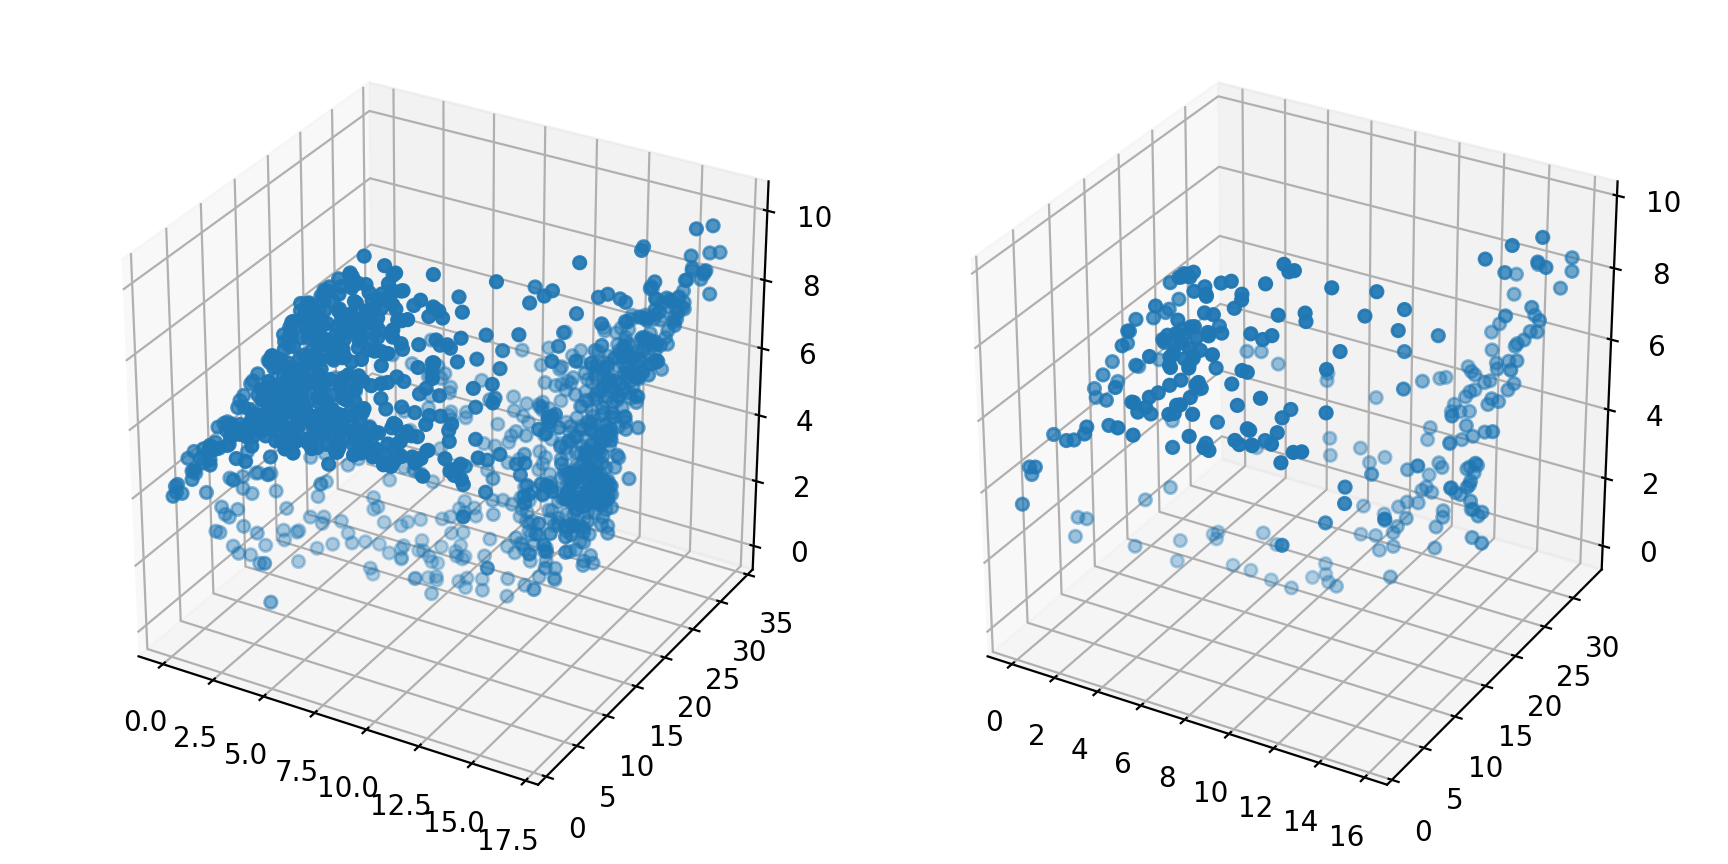

In [6]:
z_param_train = E_Z3.predict(x_train)re
z_param_test = E_Z3.predict(x_test)
#print(z_param)

fig = plt.figure(figsize=1.8/2*plt.figaspect(1/2))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(z_param_train[:,0],z_param_train[:,1],z_param_train[:,2])
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(z_param_test[:,0],z_param_test[:,1],z_param_test[:,2])

plt.tight_layout()
plt.show()

In [7]:
from sklearn.cluster import KMeans

<IPython.core.display.Javascript object>


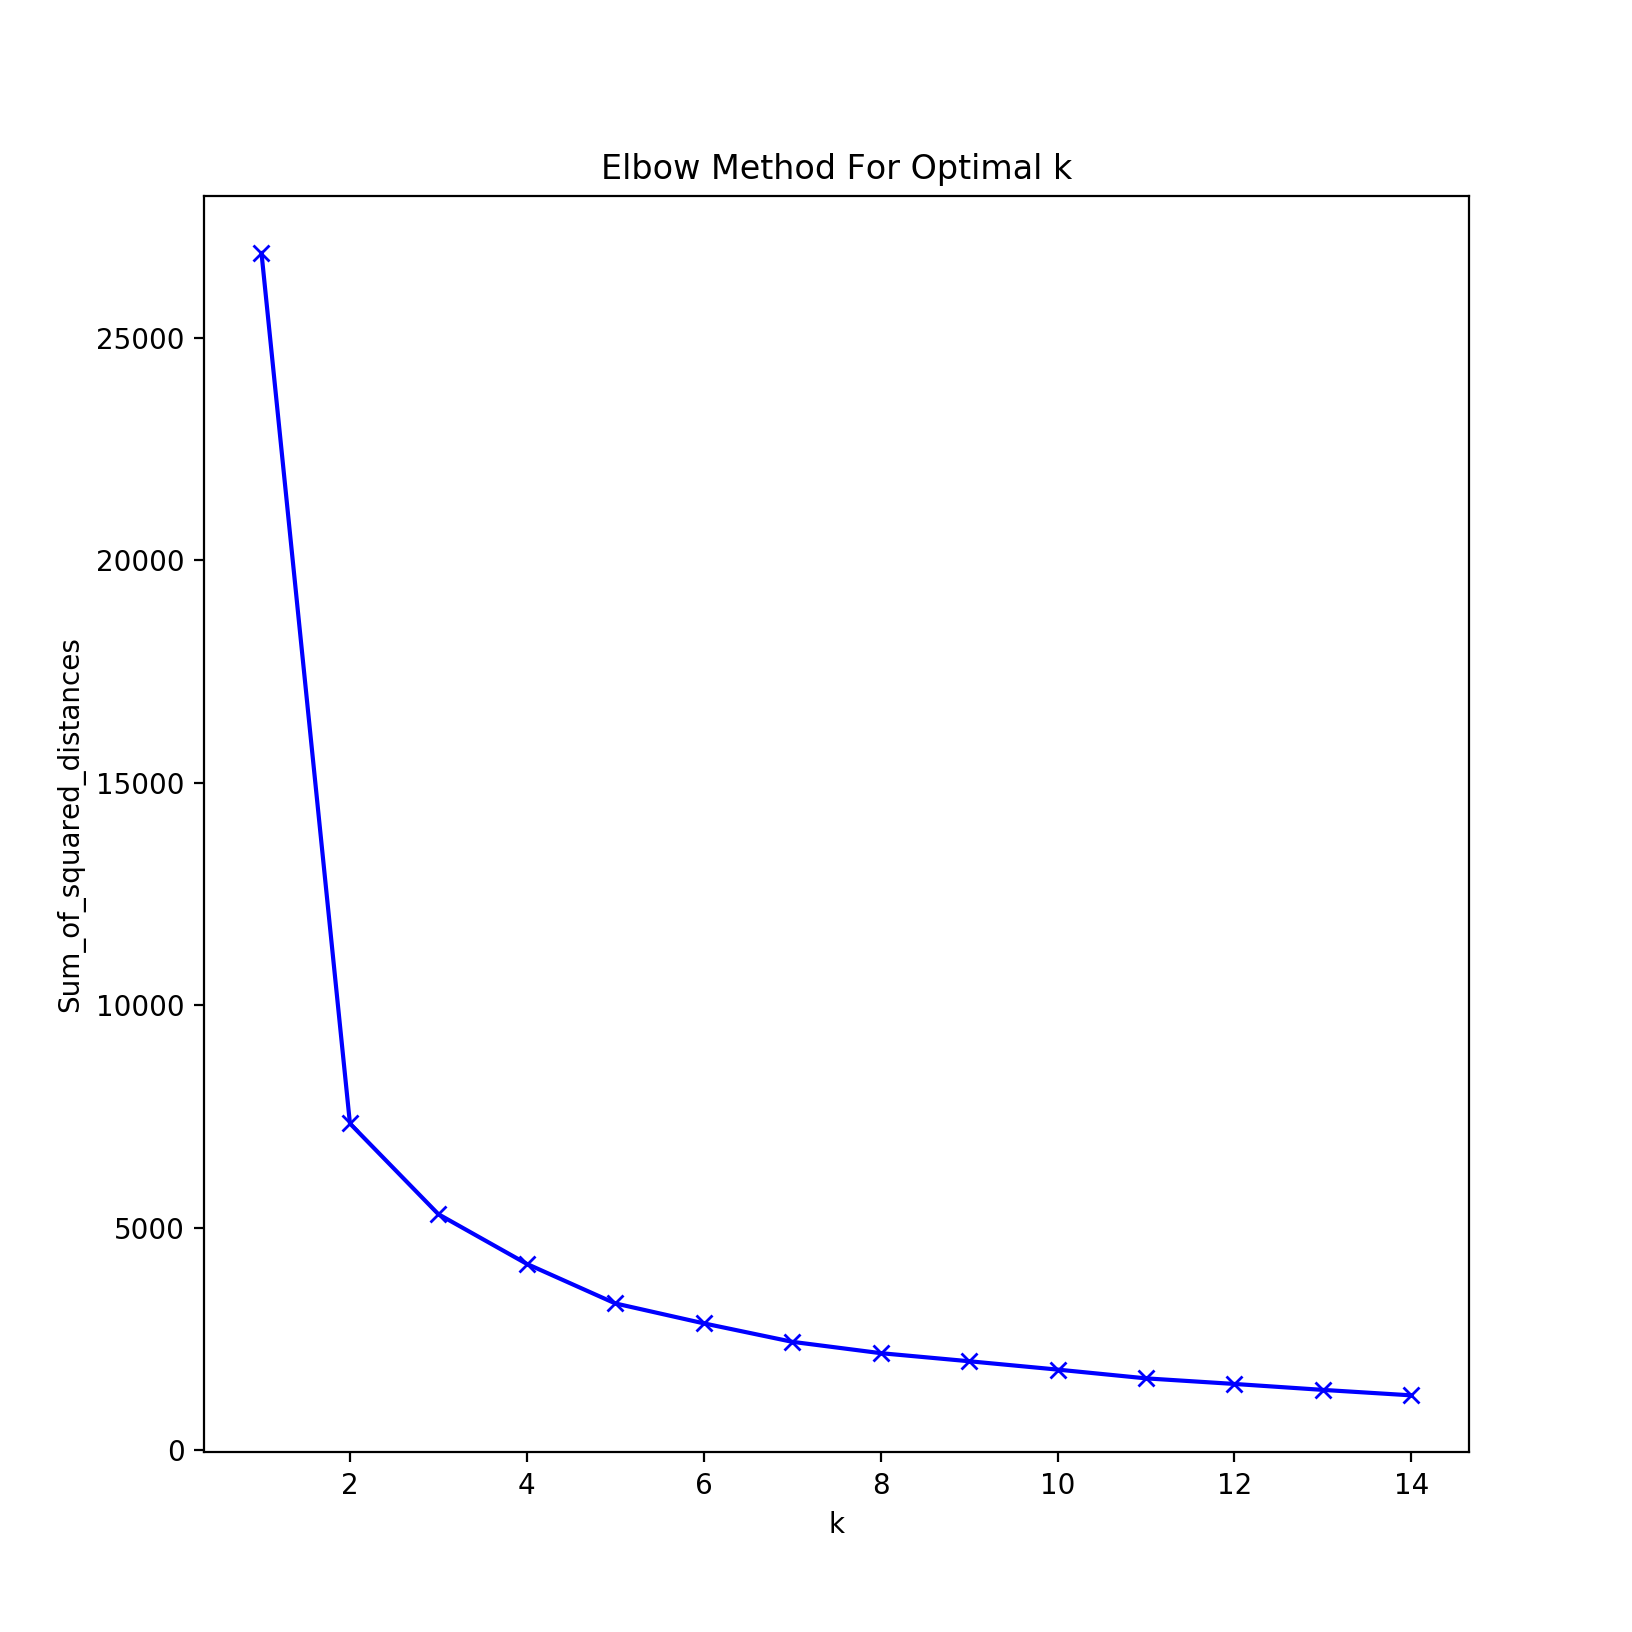

In [8]:
#Find optimal K-value using the elbow method
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(z_param_test)
    Sum_of_squared_distances.append(km.inertia_)

fig = plt.figure(figsize=1.7*plt.figaspect(1))
ax = fig.add_subplot(1, 1, 1)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

<IPython.core.display.Javascript object>


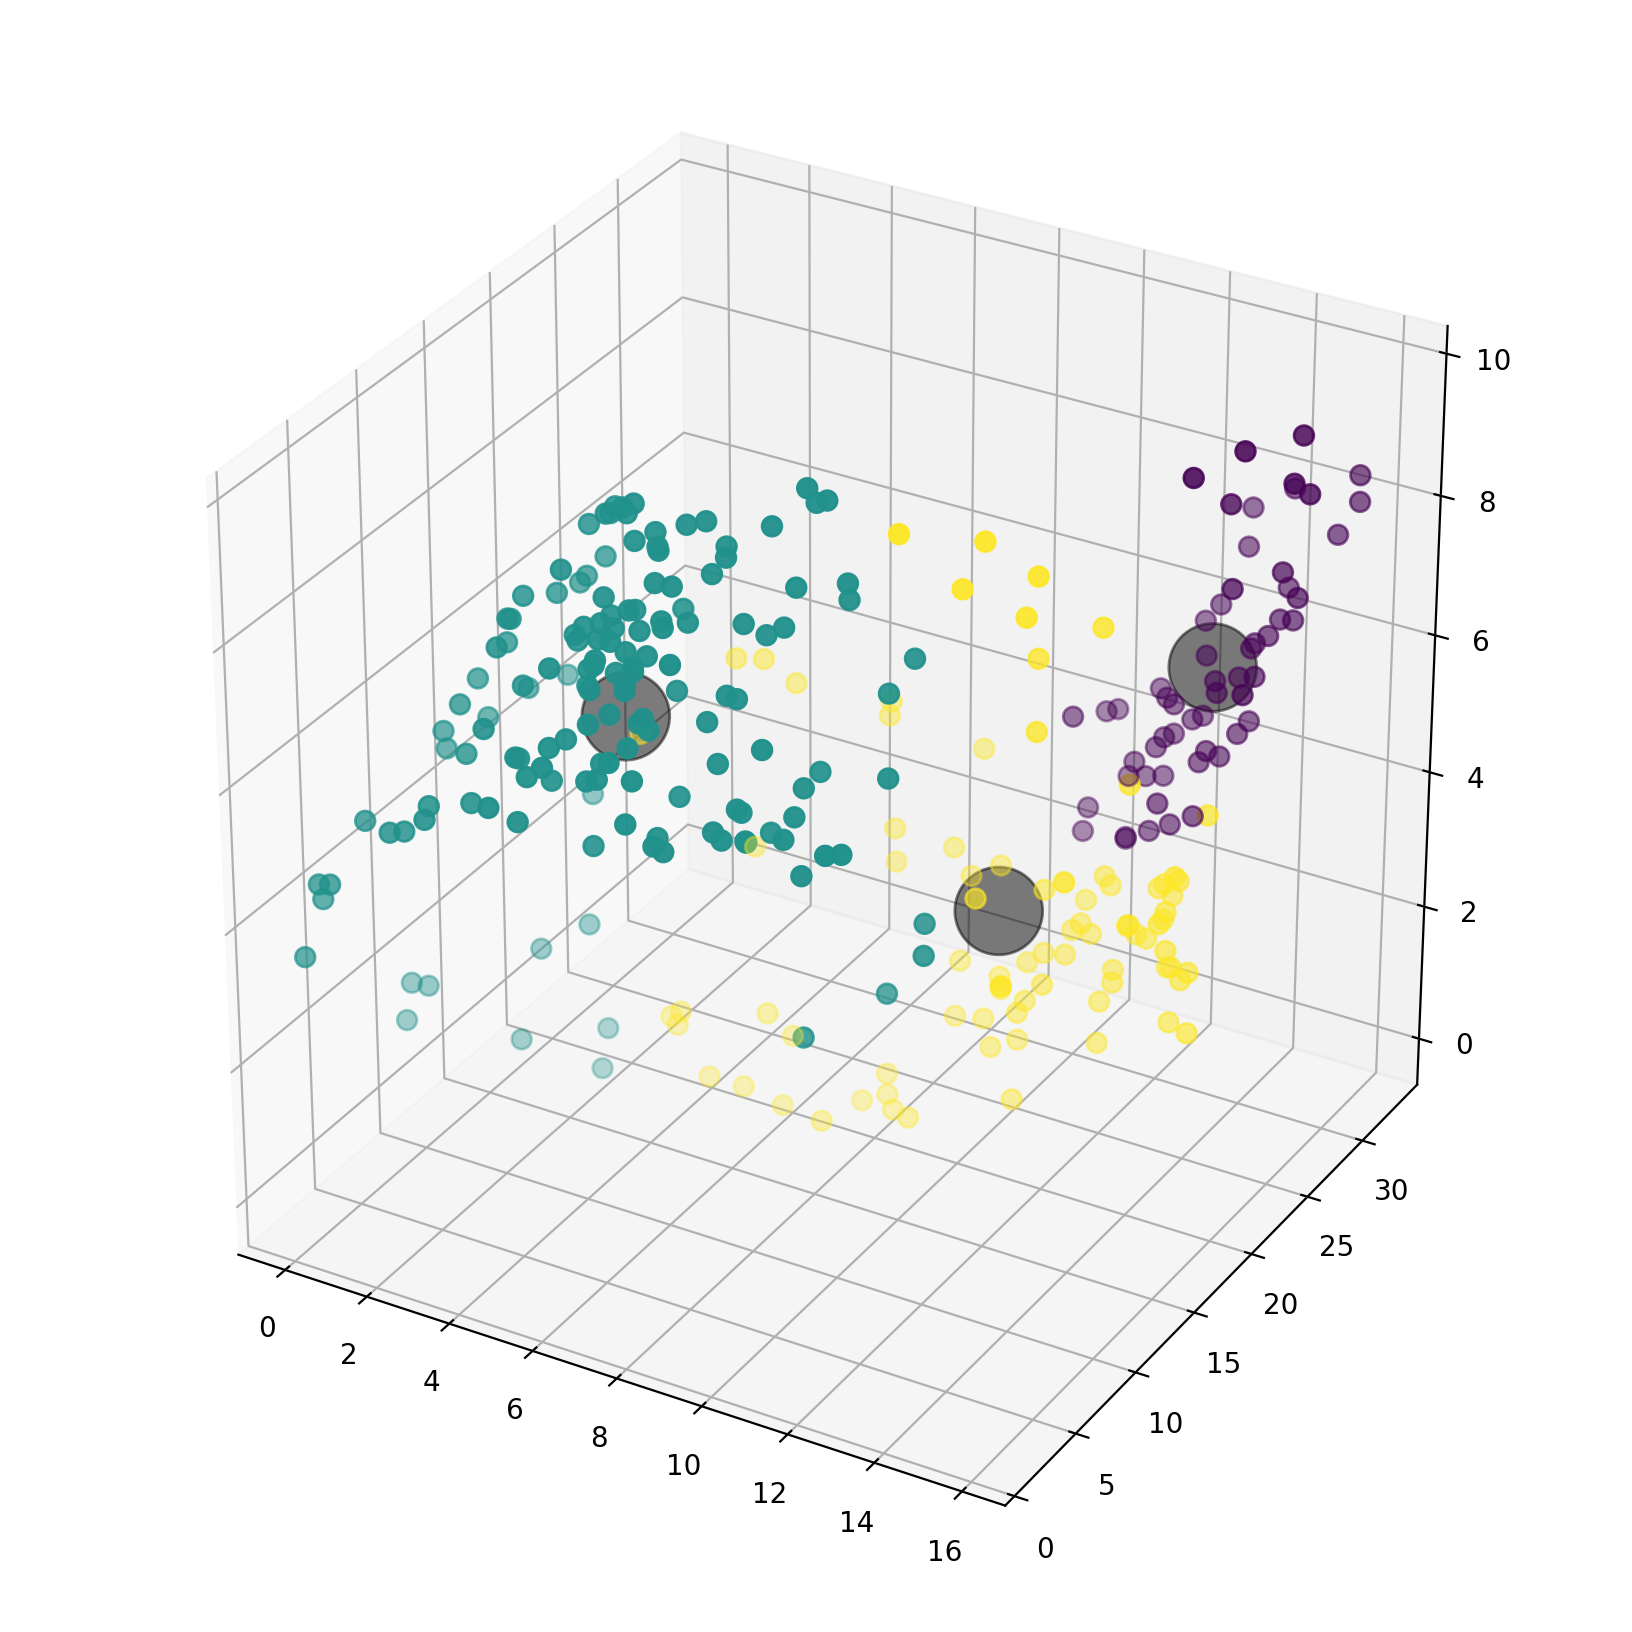

In [9]:
optK=3
kmeans = KMeans(n_clusters=optK)
kmeans.fit(z_param_test)
y_kmeans = kmeans.predict(z_param_test)

centers = kmeans.cluster_centers_
fig = plt.figure(figsize=1.7*plt.figaspect(1))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(z_param_test[:, 0], z_param_test[:, 1], z_param_test[:, 2], c=y_kmeans, s=50, cmap='viridis')
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='black', s=1000, alpha=0.5);

plt.tight_layout()

# Find similar paths using KNN on Cluster Centers